In [1]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft

In [2]:
raw_data_file_name= "tagged_data/home_to_karapitiya.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,...,imei,journeyID,lat,lon,magnetX,magnetY,magnetZ,obdRpm,obdSpeed,time
0,2.220446e-17,-0.143652,9.779027,9.873688,-0.014639,-1.465251,N,0,data_item,3682.371238,...,353424070112284,3.534241e+27,6.035515,80.269212,,,,0,0,1537579764266
1,0.000000e+00,-0.208296,9.807997,9.774328,0.018061,-1.477222,N,0,data_item,3682.371238,...,353424070112284,3.534241e+27,6.035515,80.269212,,,,0,0,1537579764366
2,-3.538836e-17,-0.093374,9.782139,9.708488,-0.029349,-1.563414,N,0,data_item,3682.371238,...,353424070112284,3.534241e+27,6.035515,80.269212,,,,0,0,1537579764466
3,1.318390e-17,-0.417788,9.826959,9.613917,-0.000558,-1.449689,N,0,data_item,3682.371238,...,353424070112284,3.534241e+27,6.035515,80.269212,,,,0,0,1537579764566
4,2.220446e-17,-0.342371,9.797654,9.569624,-0.003664,-1.375469,N,0,data_item,3682.371238,...,353424070112284,3.534241e+27,6.035515,80.269212,,,,0,0,1537579764666


In [3]:
raw_data.shape

(4525, 24)

In [4]:
tag_features = ['time','anomaly',]
tag_data = raw_data[tag_features]
tag_data['value'] = 0
i = -1
for index, row in tag_data.iterrows():
    i = i+1
    if row['anomaly'] == 'A':
        row['value'] = 1
        tag_data.value.iloc[[i]] = 1
    
#tag_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

# Actual Signal

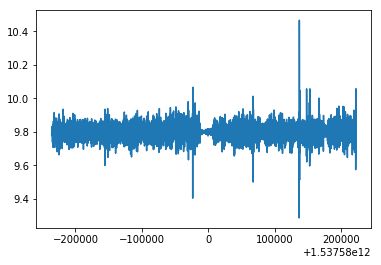

In [5]:
plt.plot(raw_data.time, raw_data.acceY)
plt.show()

# Anomaly Places

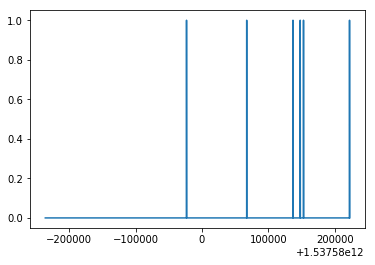

In [6]:
plt.plot(tag_data.time, tag_data.value)
plt.show()